In [52]:
import mne
import mne.viz
import numpy as np
import json
from scipy import signal
from scipy.stats import mode
import os
import matplotlib.pyplot as plt

In [53]:
path = '../json_convert_to_npy/chb05'
patient_chb = 'chb05'
json_filename_array = os.listdir(path)
json_filename_array.sort()

In [57]:
ch_names = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8']
print(f'Channels name are {ch_names}')
print(f'There are {len(ch_names)} channels')

channel = 13

Channels name are ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8']
There are 23 channels


In [58]:
print(ch_names)

['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8']


In [59]:
# Create empty array for concat file
# main_join_file_array_Fp2_T8 = np.array([])
# main_join_file_array_F8_T8 = np.array([])

# HOT CODE
main_join_array = np.array([])


# Looping through every files in json_info/chbxx/info_xx_xx.json
for index, json_filename in enumerate(json_filename_array):
    print(f'Investigating JSON: {json_filename}')

    # Read JSON data
    data = open('../' + 'json_convert_to_npy/' + patient_chb + '/' + json_filename)
    f = json.load(data)

    # Get edf filename from json info
    edf_name_from_json = json_filename.split("_")[1] + '_' + json_filename.split("_")[2].split('.')[0] + '.edf'
    print(f'Investigating EDF: {edf_name_from_json}')

    # Open dataset and create array name of edf files
    path_dataset = '../dataset/' + f['patient_ID']
    edf_filename_array = os.listdir(path_dataset)
    edf_filename_array.sort()

    # find channel using JSON data
    # Fp2_T8 = (f['channels']['Fp2_F8']) - 1
    # F8_T8 = (f['channels']['F8_T8']) - 1  
     
    # find channel HOT CODE
    selected_channel = ch_names[channel]

    # Looping through every files in dataset/chbxx/chbxx_xx.edf 
    for index, edf_filename in enumerate(edf_filename_array):
        # Check if the file name is info_xx_xx.json
        if (json_filename.endswith('.json')):
            data_file = path_dataset + '/' + f['raw_name']
            if (edf_name_from_json == edf_filename):
                raw = mne.io.read_raw(data_file) # raw = raw format
                raw_array = raw.get_data() # raw_array = ndarray format

                print(raw_array[channel].shape)
                # Concat ( New Code )
                # main_join_file_array_Fp2_T8 = np.append(main_join_file_array_Fp2_T8, raw_array[Fp2_T8])
                # main_join_file_array_F8_T8 = np.append(main_join_file_array_F8_T8, raw_array[F8_T8])
                # print(main_join_file_array_Fp2_T8.shape)

                # HOT CODE
                main_join_array = np.append(main_join_array, raw_array[channel])

            # print(main_join_file_array_F8_T8.shape)

        else: 
            print(f'-------------  No {edf_name_from_json} in dataset folder -------------')
            continue
    else:
        # print(f'-------------  {json_filename} is not an edf file  -------------')
        continue


Investigating JSON: info_chb05_01.json
Investigating EDF: chb05_01.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(924160,)
Investigating JSON: info_chb05_02.json
Investigating EDF: chb05_02.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_03.json
Investigating EDF: chb05_03.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_04.json
Investigating EDF: chb05_04.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_05.json
Investigating EDF: chb05_05.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_06.json
Investigating EDF: chb05_06.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_07.json
Investigating EDF: chb05_07.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_08.json
Investigating EDF: chb05_08.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_09.json
Investigating EDF: chb05_09.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_10.json
Investigating EDF: chb05_10.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_11.json
Investigating EDF: chb05_11.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_12.json
Investigating EDF: chb05_12.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_13.json
Investigating EDF: chb05_13.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_14.json
Investigating EDF: chb05_14.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_15.json
Investigating EDF: chb05_15.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_16.json
Investigating EDF: chb05_16.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_17.json
Investigating EDF: chb05_17.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_18.json
Investigating EDF: chb05_18.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_19.json
Investigating EDF: chb05_19.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_20.json
Investigating EDF: chb05_20.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_21.json
Investigating EDF: chb05_21.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_22.json
Investigating EDF: chb05_22.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_23.json
Investigating EDF: chb05_23.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_24.json
Investigating EDF: chb05_24.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_25.json
Investigating EDF: chb05_25.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_26.json
Investigating EDF: chb05_26.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_27.json
Investigating EDF: chb05_27.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_28.json
Investigating EDF: chb05_28.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_29.json
Investigating EDF: chb05_29.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)
Investigating JSON: info_chb05_30.json
Investigating EDF: chb05_30.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format
/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


(921600,)
Investigating JSON: info_chb05_31.json
Investigating EDF: chb05_31.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


Investigating JSON: info_chb05_32.json
Investigating EDF: chb05_32.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


Investigating JSON: info_chb05_33.json
Investigating EDF: chb05_33.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


Investigating JSON: info_chb05_34.json
Investigating EDF: chb05_34.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


Investigating JSON: info_chb05_35.json
Investigating EDF: chb05_35.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


Investigating JSON: info_chb05_36.json
Investigating EDF: chb05_36.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


Investigating JSON: info_chb05_37.json
Investigating EDF: chb05_37.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


Investigating JSON: info_chb05_38.json
Investigating EDF: chb05_38.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


Investigating JSON: info_chb05_39.json
Investigating EDF: chb05_39.edf
Extracting EDF parameters from /Users/sirap/Documents/Capstone-BCI-13/dataset/chb05/chb05_39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(921600,)


/var/folders/fx/s9d23h851bqgcdp14ny244k80000gn/T/ipykernel_46954/502208979.py:39: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw(data_file) # raw = raw format


39.00277777777778
(35944960,)
0.0017494505494505491
-0.0016986568986568987


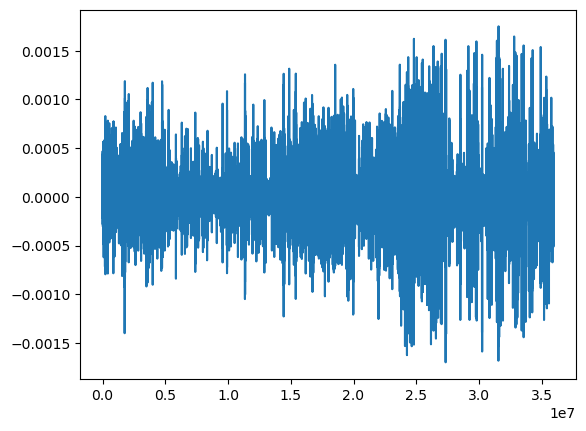

In [60]:
print(main_join_array.shape[0]/(3600*256))
print(main_join_array.shape)
print(np.max(main_join_array))
print(np.min(main_join_array))

plt.plot(main_join_array)
# plt.vlines([63938*256, 63973*256], np.min(main_join_array), np.max(main_join_array), color='red' ,linestyle="dashed")

plt.show()

(35944960,)


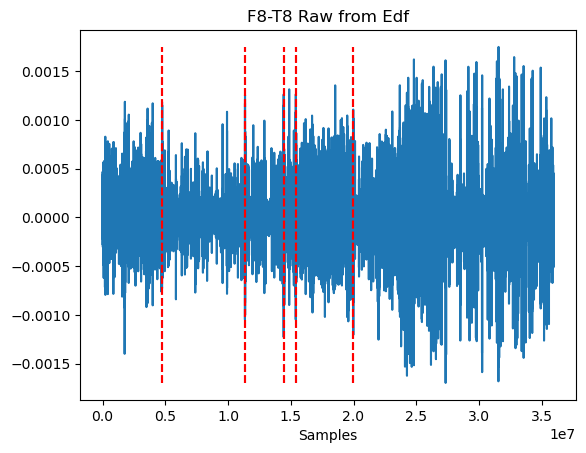

In [61]:
# # chb1
# seizure_info_start = np.array([10196, 12267, 52132, 55015, 62920, 71390, 90925]) * 256
# seizure_info_stop =  np.array([10236, 12294, 52172, 55066, 63010, 71483, 91026]) * 256

# chb10
# seizure_info_start = np.array([63938, 122113, 139219, 154276, 162269, 170307, 174272]) * 256 # in samples
# seizure_info_stop  = np.array([63973, 122183, 139284, 154334, 162345, 170396, 174326]) * 256 # in samples

# chb05
seizure_info_start = np.array([18427, 44296, 56327, 60061, 77958]) * 256 # in samples
seizure_info_stop  = np.array([18542, 44406, 56423, 60181, 78075]) * 256 # in samples

# main_join_array2 = main_join_array[seizure_info_start[0] - (1 * 60 * 60 * 256): seizure_info_stop[0] + 600 * 256]
main_join_array2 = main_join_array
print(main_join_array2.shape)

plt.plot(main_join_array2)
plt.title('F8-T8 Raw from Edf')
plt.xlabel('Samples')
plt.vlines([seizure_info_start[0], seizure_info_stop[0]], np.min(main_join_array2), np.max(main_join_array2), color='red' ,linestyle="dashed")
plt.vlines([seizure_info_start[1], seizure_info_stop[1]], np.min(main_join_array2), np.max(main_join_array2), color='red' ,linestyle="dashed")
plt.vlines([seizure_info_start[2], seizure_info_stop[2]], np.min(main_join_array2), np.max(main_join_array2), color='red' ,linestyle="dashed")
plt.vlines([seizure_info_start[3], seizure_info_stop[3]], np.min(main_join_array2), np.max(main_join_array2), color='red' ,linestyle="dashed")
plt.vlines([seizure_info_start[4], seizure_info_stop[4]], np.min(main_join_array2), np.max(main_join_array2), color='red' ,linestyle="dashed")



# plt.vlines([1*60*60*256, 1*60*60*256 + 35*256], np.min(main_join_array2), np.max(main_join_array2), color='red' ,linestyle="dashed")
# plt.xlim([1*60*60*256 - 100000, 1*60*60*256 + 35*256 + 1000])
# plt.xlim([seizure_info_start[0] - 3600*256, seizure_info_stop[0] + 600*256])

plt.show()

In [51]:
# np.save('main_join_file_array_F8_T8.npy', main_join_file_array_F8_T8)
# np.save('main_join_file_array_Fp2_T8.npy', main_join_file_array_Fp2_T8)

# HOT CODE  
# np.save('main_join_file_array_T8-P8.npy', main_join_array)

# HOT CODE FOR MATLAB
np.savetxt("F8_T8_chb05_concat.csv", main_join_array2, delimiter=",")


### END

In [85]:
seizure_info_start = np.array([10196, 12267, 52132, 55015, 62920, 71390, 90925]) / (3600)
seizure_info_stop =  np.array([10236, 12294, 52172, 55066, 63010, 71483, 91026]) / (3600)

In [86]:
# Plot join_file
import matplotlib.pyplot as plt
t = np.linspace(0, main_join_file_array_Fp2_T8.shape[0]/(3600*256), main_join_file_array_Fp2_T8.shape[0], False)

plt.subplot(211)
plt.title('Raw concat file')
plt.plot(t, main_join_file_array_Fp2_T8)

plt.subplot(212)
plt.plot(t, main_join_file_array_F8_T8)
plt.show()

NameError: name 'main_join_file_array_Fp2_T8' is not defined

In [ ]:
main_join_file_array_Fp2_T8 = np.load('./main_join_file_array_Fp2_T8.npy')
main_join_file_array_F8_T8  = np.load('./main_join_file_array_F8_T8.npy')

In [ ]:
# Normalise 
main_join_file_array_Fp2_T8 = (main_join_file_array_Fp2_T8-np.min(main_join_file_array_Fp2_T8))/(np.max(main_join_file_array_Fp2_T8)-np.min(main_join_file_array_Fp2_T8))
main_join_file_array_F8_T8 = (main_join_file_array_F8_T8-np.min(main_join_file_array_F8_T8))/(np.max(main_join_file_array_F8_T8)-np.min(main_join_file_array_F8_T8))
t = np.linspace(0, main_join_file_array_Fp2_T8.shape[0]/(3600*256), main_join_file_array_Fp2_T8.shape[0], False)

plt.subplot(211)
plt.title('Normalise concat file')
plt.plot(t, main_join_file_array_Fp2_T8)
# HOT CODE : Dash line for seizure 
plt.vlines(seizure_info_start[0], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[0], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[1], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[1], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[2], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[2], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[3], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[3], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[4], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[4], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[5], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[5], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[6], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[6], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.subplot(212)
plt.plot(t, main_join_file_array_F8_T8)

plt.vlines(seizure_info_start[0], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[0], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[1], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[1], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[2], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[2], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[3], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[3], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[4], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[4], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[5], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[5], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.vlines(seizure_info_start[6], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")
plt.vlines(seizure_info_stop[6], np.min(main_join_file_array_Fp2_T8), np.max(main_join_file_array_Fp2_T8), color='red' ,linestyle="dashed")

plt.show()

In [ ]:
# apply filter bank
filter_band_1 = [-0.00107993806311353, -0.00106217163565181, -0.00104510238307734, -0.00102882032057693, -0.00101357133327608, -0.000999782376564196, -0.000988081923526628, -0.000979314791103734, -0.000974550588472947, -0.000975085164257233, -0.000982434580981359, -0.000998321312744441, -0.00102465254197012, -0.00106349061961468, -0.00111701594637719, -0.00118748272610121, -0.00127716823242759, -0.00138831641158684, -0.00152307681382854, -0.00168343999936680, -0.00187117069813066, -0.00208774011264687, -0.00233425883707135, -0.00261141192023950, -0.00291939762469068, -0.00325787142560709, -0.00362589675279992, -0.00402190390525106, -0.00444365846192655, -0.00488824037594689, -0.00535203477371457, -0.00583073528887907, -0.00631936054626844, -0.00681228417687241, -0.00730327849582716, -0.00778557171571805, -0.00825191830227724, -0.00869468181380980, -0.00910592930464674, -0.00947753612181550, -0.00980129968806068, -0.0100690606482630, -0.0102728295648152, -0.0104049171848486, -0.0104580661720998, -0.0104255821018470, -0.0103014614612624, -0.0100805143815706, -0.00975847985367612, -0.00933213124576528, -0.00879937004933520, -0.00815930592792519, -0.00741232132849578, -0.00656011913616001, -0.00560575210535546, -0.00455363308044548, -0.00340952532147838, -0.00218051257124607, -0.000874948832308795, 0.000497611838562294, 0.00192650487206738, 0.00340006308460933, 0.00490574163233417, 0.00643025841693759, 0.00795974805938918, 0.00947992730667490, 0.0109762695191370, 0.0124341857062006, 0.0138392094397595, 0.0151771828800697, 0.0164344411006942, 0.0175979918980667, 0.0186556883179377, 0.0195963912248275, 0.0204101193802545, 0.0210881846787323, 0.0216233104143159, 0.0220097307110830, 0.0222432695439173, 0.0223213980962941, 0.0222432695439173, 0.0220097307110830, 0.0216233104143159, 0.0210881846787323, 0.0204101193802545, 0.0195963912248275, 0.0186556883179377, 0.0175979918980667, 0.0164344411006942, 0.0151771828800697, 0.0138392094397595, 0.0124341857062006, 0.0109762695191370, 0.00947992730667490, 0.00795974805938918, 0.00643025841693759, 0.00490574163233417, 0.00340006308460933, 0.00192650487206738, 0.000497611838562294, -0.000874948832308795, -0.00218051257124607, -0.00340952532147838, -0.00455363308044548, -0.00560575210535546, -0.00656011913616001, -0.00741232132849578, -0.00815930592792519, -0.00879937004933520, -0.00933213124576528, -0.00975847985367612, -0.0100805143815706, -0.0103014614612624, -0.0104255821018470, -0.0104580661720998, -0.0104049171848486, -0.0102728295648152, -0.0100690606482630, -0.00980129968806068, -0.00947753612181550, -0.00910592930464674, -0.00869468181380980, -0.00825191830227724, -0.00778557171571805, -0.00730327849582716, -0.00681228417687241, -0.00631936054626844, -0.00583073528887907, -0.00535203477371457, -0.00488824037594689, -0.00444365846192655, -0.00402190390525106, -0.00362589675279992, -0.00325787142560709, -0.00291939762469068, -0.00261141192023950, -0.00233425883707135, -0.00208774011264687, -0.00187117069813066, -0.00168343999936680, -0.00152307681382854, -0.00138831641158684, -0.00127716823242759, -0.00118748272610121, -0.00111701594637719, -0.00106349061961468, -0.00102465254197012, -0.000998321312744441, -0.000982434580981359, -0.000975085164257233, -0.000974550588472947, -0.000979314791103734, -0.000988081923526628, -0.000999782376564196, -0.00101357133327608, -0.00102882032057693, -0.00104510238307734, -0.00106217163565181, -0.00107993806311353]
filter_band_2 = [9.24465419620629e-05, 8.85624593951150e-05, 7.71308595935144e-05, 5.70667383037532e-05, 2.71502517337408e-05, -1.39162505258435e-05, -6.74125471153623e-05, -0.000134468936260427, -0.000215904519097345, -0.000312044134034648, -0.000422525279195401, -0.000546108402760712, -0.000680505294621459, -0.000822240854706973, -0.000966563160628693, -0.00110741547217309, -0.00123748160426776, -0.00134831303558421, -0.00143054230876264, -0.00147418287805954, -0.00146901076845603, -0.00140501845566192, -0.00127292650876755, -0.00106473401558667, -0.000774284890716866, -0.000397824087464417, 6.54842924164026e-05, 0.000613105802771138, 0.00123877964715837, 0.00193228420268682, 0.00267934707924663, 0.00346171805939925, 0.00425741741491116, 0.00504116525831228, 0.00578499001877723, 0.00645900613464317, 0.00703234296818263, 0.00747419913051841, 0.00775498921936623, 0.00784754377173012, 0.00772831834202055, 0.00737856431405794, 0.00678541256605374, 0.00594282158407318, 0.00485234413562198, 0.00352367115950149, 0.00197491800175350, 0.000232626344659053, -0.00166853513072734, -0.00368637747773276, -0.00577210017489262, -0.00787148447704744, -0.00992634244996560, -0.0118761816927611, -0.0136600358620998, -0.0152184027869560, -0.0164952255876270, -0.0174398481043267, -0.0180088743319081, -0.0181678625858013, -0.0178927888246527, -0.0171712198550594, -0.0160031458646953, -0.0144014325924475, -0.0123918660767997, -0.0100127768773624, -0.00731424542869993, -0.00435690520850040, -0.00121037511192789, 0.00204863374797808, 0.00533847919039576, 0.00857494895907577, 0.0116737453084885, 0.0145530114787414, 0.0171358158194882, 0.0193525098367172, 0.0211428800075092, 0.0224580197269964, 0.0232618569940669, 0.0235322850762632, 0.0232618569940669, 0.0224580197269964, 0.0211428800075092, 0.0193525098367172, 0.0171358158194882, 0.0145530114787414, 0.0116737453084885, 0.00857494895907577, 0.00533847919039576, 0.00204863374797808, -0.00121037511192789, -0.00435690520850040, -0.00731424542869993, -0.0100127768773624, -0.0123918660767997, -0.0144014325924475, -0.0160031458646953, -0.0171712198550594, -0.0178927888246527, -0.0181678625858013, -0.0180088743319081, -0.0174398481043267, -0.0164952255876270, -0.0152184027869560, -0.0136600358620998, -0.0118761816927611, -0.00992634244996560, -0.00787148447704744, -0.00577210017489262, -0.00368637747773276, -0.00166853513072734, 0.000232626344659053, 0.00197491800175350, 0.00352367115950149, 0.00485234413562198, 0.00594282158407318, 0.00678541256605374, 0.00737856431405794, 0.00772831834202055, 0.00784754377173012, 0.00775498921936623, 0.00747419913051841, 0.00703234296818263, 0.00645900613464317, 0.00578499001877723, 0.00504116525831228, 0.00425741741491116, 0.00346171805939925, 0.00267934707924663, 0.00193228420268682, 0.00123877964715837, 0.000613105802771138, 6.54842924164026e-05, -0.000397824087464417, -0.000774284890716866, -0.00106473401558667, -0.00127292650876755, -0.00140501845566192, -0.00146901076845603, -0.00147418287805954, -0.00143054230876264, -0.00134831303558421, -0.00123748160426776, -0.00110741547217309, -0.000966563160628693, -0.000822240854706973, -0.000680505294621459, -0.000546108402760712, -0.000422525279195401, -0.000312044134034648, -0.000215904519097345, -0.000134468936260427, -6.74125471153623e-05, -1.39162505258435e-05, 2.71502517337408e-05, 5.70667383037532e-05, 7.71308595935144e-05, 8.85624593951150e-05, 9.24465419620629e-05]
filter_band_3 = [4.05568493008054e-05, 9.91986524849151e-06, -3.27975086399816e-05, -8.71016238998287e-05, -0.000151741668989157, -0.000224489182257267, -0.000301913530300002, -0.000379201424793642, -0.000450073733756132, -0.000506851157361419, -0.000540711226656778, -0.000542162798717908, -0.000501741854739701, -0.000410905830235914, -0.000263075432219409, -5.47458685338766e-05, 0.000213433270226274, 0.000535725619110375, 0.000900644858523925, 0.00129067647326527, 0.00168248182066925, 0.00204765148890000, 0.00235403403202537, 0.00256761743757390, 0.00265488777315244, 0.00258553676214860, 0.00233534233655093, 0.00188900828070861, 0.00124272525120117, 0.000406209220132064, -0.000596012995581380, -0.00172426723714936, -0.00292448677191714, -0.00413012967795762, -0.00526524662184444, -0.00624859622756019, -0.00699861435378107, -0.00743895964455144, -0.00750428789865896, -0.00714585870746563, -0.00633655484898834, -0.00507490181869828, -0.00338771325912798, -0.00133105721554970, 0.00101066503160708, 0.00352761676354430, 0.00608935564848193, 0.00855141143390244, 0.0107632919785987, 0.0125774771087851, 0.0138588628202628, 0.0144940537772940, 0.0143998762693351, 0.0135305006296050, 0.0118826225076365, 0.00949825410605768, 0.00646481423313198, 0.00291237165883950, -0.000991920666205665, -0.00505197457435432, -0.00905309209194124, -0.0127739002519791, -0.0159992002606525, -0.0185329502142794, -0.0202105643226907, -0.0209097288723878, -0.0205590063253225, -0.0191436206109062, -0.0167079818441980, -0.0133547072228570, -0.00924011402047021, -0.00456638602385302, 0.000429168621809851, 0.00548715712157735, 0.0103406720601879, 0.0147305161998462, 0.0184201539030476, 0.0212094683046178, 0.0229464705649707, 0.0235362306803060, 0.0229464705649707, 0.0212094683046178, 0.0184201539030476, 0.0147305161998462, 0.0103406720601879, 0.00548715712157735, 0.000429168621809851, -0.00456638602385302, -0.00924011402047021, -0.0133547072228570, -0.0167079818441980, -0.0191436206109062, -0.0205590063253225, -0.0209097288723878, -0.0202105643226907, -0.0185329502142794, -0.0159992002606525, -0.0127739002519791, -0.00905309209194124, -0.00505197457435432, -0.000991920666205665, 0.00291237165883950, 0.00646481423313198, 0.00949825410605768, 0.0118826225076365, 0.0135305006296050, 0.0143998762693351, 0.0144940537772940, 0.0138588628202628, 0.0125774771087851, 0.0107632919785987, 0.00855141143390244, 0.00608935564848193, 0.00352761676354430, 0.00101066503160708, -0.00133105721554970, -0.00338771325912798, -0.00507490181869828, -0.00633655484898834, -0.00714585870746563, -0.00750428789865896, -0.00743895964455144, -0.00699861435378107, -0.00624859622756019, -0.00526524662184444, -0.00413012967795762, -0.00292448677191714, -0.00172426723714936, -0.000596012995581380, 0.000406209220132064, 0.00124272525120117, 0.00188900828070861, 0.00233534233655093, 0.00258553676214860, 0.00265488777315244, 0.00256761743757390, 0.00235403403202537, 0.00204765148890000, 0.00168248182066925, 0.00129067647326527, 0.000900644858523925, 0.000535725619110375, 0.000213433270226274, -5.47458685338766e-05, -0.000263075432219409, -0.000410905830235914, -0.000501741854739701, -0.000542162798717908, -0.000540711226656778, -0.000506851157361419, -0.000450073733756132, -0.000379201424793642, -0.000301913530300002, -0.000224489182257267, -0.000151741668989157, -8.71016238998287e-05, -3.27975086399816e-05, 9.91986524849151e-06, 4.05568493008054e-05]
filter_band_4 = [-2.37755465563127e-05, -7.54488501182026e-05, -0.000135185097965791, -0.000197126149209651, -0.000253782016444110, -0.000296286963540858, -0.000314923213857793, -0.000299982284046228, -0.000242979151143352, -0.000138157166280288, 1.58659742249548e-05, 0.000214542651262042, 0.000446219889609860, 0.000691652560156669, 0.000924481350377313, 0.00111286377973549, 0.00122230759916255, 0.00121957954199551, 0.00107737044646575, 0.000779217889097063, 0.000324049487221106, -0.000270358346199424, -0.000965689060838149, -0.00170372124543236, -0.00240962752828757, -0.00299797065631739, -0.00338107660121645, -0.00347910245385377, -0.00323079449792006, -0.00260369755704932, -0.00160247252035717, -0.000274034247236334, 0.00129155165471530, 0.00296508703465547, 0.00458733079453202, 0.00598272046271484, 0.00697667859854179, 0.00741491155904696, 0.00718269865888140, 0.00622195922379128, 0.00454391759190356, 0.00223547980767094, -0.000542021708534469, -0.00356231128067265, -0.00655159486739934, -0.00921271813784052, -0.0112539905877847, -0.0124199187102494, -0.0125206622281902, -0.0114569269737111, -0.00923727000300756, -0.00598541088701646, -0.00193607019803594, 0.00258099389695042, 0.00716782362824101, 0.0113938187888937, 0.0148367965221444, 0.0171255697855808, 0.0179796867114379, 0.0172420530405899, 0.0149007056614412, 0.0110969776463657, 0.00611860559634064, 0.000377849191640076, -0.00562373664152806, -0.0113407830238971, -0.0162355725646101, -0.0198304580313102, -0.0217559498425204, -0.0217894840688195, -0.0198807109428206, -0.0161604287726853, -0.0109319027790520, -0.00464508759955234, 0.00214396994780568, 0.00882472155742775, 0.0147897009010188, 0.0194924290519816, 0.0224998814893366, 0.0235342620603006, 0.0224998814893366, 0.0194924290519816, 0.0147897009010188, 0.00882472155742775, 0.00214396994780568, -0.00464508759955234, -0.0109319027790520, -0.0161604287726853, -0.0198807109428206, -0.0217894840688195, -0.0217559498425204, -0.0198304580313102, -0.0162355725646101, -0.0113407830238971, -0.00562373664152806, 0.000377849191640076, 0.00611860559634064, 0.0110969776463657, 0.0149007056614412, 0.0172420530405899, 0.0179796867114379, 0.0171255697855808, 0.0148367965221444, 0.0113938187888937, 0.00716782362824101, 0.00258099389695042, -0.00193607019803594, -0.00598541088701646, -0.00923727000300756, -0.0114569269737111, -0.0125206622281902, -0.0124199187102494, -0.0112539905877847, -0.00921271813784052, -0.00655159486739934, -0.00356231128067265, -0.000542021708534469, 0.00223547980767094, 0.00454391759190356, 0.00622195922379128, 0.00718269865888140, 0.00741491155904696, 0.00697667859854179, 0.00598272046271484, 0.00458733079453202, 0.00296508703465547, 0.00129155165471530, -0.000274034247236334, -0.00160247252035717, -0.00260369755704932, -0.00323079449792006, -0.00347910245385377, -0.00338107660121645, -0.00299797065631739, -0.00240962752828757, -0.00170372124543236, -0.000965689060838149, -0.000270358346199424, 0.000324049487221106, 0.000779217889097063, 0.00107737044646575, 0.00121957954199551, 0.00122230759916255, 0.00111286377973549, 0.000924481350377313, 0.000691652560156669, 0.000446219889609860, 0.000214542651262042, 1.58659742249548e-05, -0.000138157166280288, -0.000242979151143352, -0.000299982284046228, -0.000314923213857793, -0.000296286963540858, -0.000253782016444110, -0.000197126149209651, -0.000135185097965791, -7.54488501182026e-05, -2.37755465563127e-05]
filter_band_5 = [-8.25409658428109e-05, -0.000139765758160562, -0.000189984479364148, -0.000220977960242162, -0.000220793193805340, -0.000179687654761451, -9.23670535970729e-05, 3.97530713518094e-05, 0.000206703148531369, 0.000389091642483222, 0.000558776442653258, 0.000681488108663034, 0.000721504882577139, 0.000648039691338143, 0.000442509436653692, 0.000105423927229312, -0.000338627172940407, -0.000839395554312734, -0.00132396245541680, -0.00170477966840913, -0.00189232994728499, -0.00181095513780384, -0.00141547710442119, -0.000705615253438141, 0.000264936464691418, 0.00138746198484246, 0.00250684960173142, 0.00344000711841334, 0.00400238630718909, 0.00403918325420695, 0.00345640445847324, 0.00224629919034312, 0.000501876446252219, -0.00158357268836834, -0.00373393519175673, -0.00562399723501012, -0.00692579126630320, -0.00736131332303243, -0.00675352415258184, -0.00506691465401633, -0.00242971663116624, 0.000867920242794556, 0.00440203120341257, 0.00766731556102946, 0.0101478673294528, 0.0113964505623437, 0.0111103322505341, 0.00919119953064077, 0.00577822238111578, 0.00124677915207280, -0.00382968985574208, -0.00875150691469671, -0.0127894463078470, -0.0152928959345073, -0.0157933756007119, -0.0140869905935770, -0.0102817048118563, -0.00480001198900324, 0.00166595956073591, 0.00824259971935006, 0.0139949535886911, 0.0180620435282273, 0.0197874371423750, 0.0188249723290754, 0.0152025384562556, 0.00933258862069921, 0.00196581290867215, -0.00590701624719734, -0.0131919301907557, -0.0188479793505628, -0.0220398869611243, -0.0222641987415113, -0.0194294627261450, -0.0138775155764657, -0.00634160441110654, 0.00215346776410426, 0.0104351718247020, 0.0173502612331720, 0.0219304600697320, 0.0235323211560674, 0.0219304600697320, 0.0173502612331720, 0.0104351718247020, 0.00215346776410426, -0.00634160441110654, -0.0138775155764657, -0.0194294627261450, -0.0222641987415113, -0.0220398869611243, -0.0188479793505628, -0.0131919301907557, -0.00590701624719734, 0.00196581290867215, 0.00933258862069921, 0.0152025384562556, 0.0188249723290754, 0.0197874371423750, 0.0180620435282273, 0.0139949535886911, 0.00824259971935006, 0.00166595956073591, -0.00480001198900324, -0.0102817048118563, -0.0140869905935770, -0.0157933756007119, -0.0152928959345073, -0.0127894463078470, -0.00875150691469671, -0.00382968985574208, 0.00124677915207280, 0.00577822238111578, 0.00919119953064077, 0.0111103322505341, 0.0113964505623437, 0.0101478673294528, 0.00766731556102946, 0.00440203120341257, 0.000867920242794556, -0.00242971663116624, -0.00506691465401633, -0.00675352415258184, -0.00736131332303243, -0.00692579126630320, -0.00562399723501012, -0.00373393519175673, -0.00158357268836834, 0.000501876446252219, 0.00224629919034312, 0.00345640445847324, 0.00403918325420695, 0.00400238630718909, 0.00344000711841334, 0.00250684960173142, 0.00138746198484246, 0.000264936464691418, -0.000705615253438141, -0.00141547710442119, -0.00181095513780384, -0.00189232994728499, -0.00170477966840913, -0.00132396245541680, -0.000839395554312734, -0.000338627172940407, 0.000105423927229312, 0.000442509436653692, 0.000648039691338143, 0.000721504882577139, 0.000681488108663034, 0.000558776442653258, 0.000389091642483222, 0.000206703148531369, 3.97530713518094e-05, -9.23670535970729e-05, -0.000179687654761451, -0.000220793193805340, -0.000220977960242162, -0.000189984479364148, -0.000139765758160562, -8.25409658428109e-05]
filter_band_6 = [-0.000124474476447680, -0.000166430371954174, -0.000178974155619620, -0.000149042763266301, -7.07388253912474e-05, 5.14277545020950e-05, 0.000200664424675636, 0.000348301193138761, 0.000457221618568168, 0.000488545218222327, 0.000410942063553405, 0.000210957628724503, -9.81460042396853e-05, -0.000471929347894839, -0.000837243431727199, -0.00110295949835311, -0.00117834194097923, -0.000996150617200605, -0.000535510707673397, 0.000161560267975292, 0.000985797123590716, 0.00177239091013768, 0.00232923332486819, 0.00247795313779849, 0.00209992991682414, 0.00117668577243324, -0.000186482150451331, -0.00176253098238370, -0.00323437952045760, -0.00425360527967623, -0.00451634901092970, -0.00384089885275125, -0.00222866726819880, 0.000108391383032695, 0.00276522017992940, 0.00520810023208913, 0.00687737451376724, 0.00730959079597825, 0.00625330333071820, 0.00375115765833474, 0.000165526670111853, -0.00386455277493526, -0.00753293498897343, -0.0100247605696052, -0.0106931237243915, -0.00921630316037805, -0.00569866891630660, -0.000687680011240790, 0.00490423631975691, 0.00996384454046420, 0.0133983321434721, 0.0143697054220240, 0.0124922031425717, 0.00794707307463684, 0.00148400910633410, -0.00569869731276041, -0.0121772666044315, -0.0165871803017459, -0.0179121084507418, -0.0157154120538397, -0.0102617157875742, -0.00249705487140185, 0.00611502057380312, 0.0138732195774573, 0.0191799675457783, 0.0208749490662926, 0.0184901357751648, 0.0123698434559303, 0.00362610975855164, -0.00606635011816188, -0.0147972903893698, -0.0208050508273709, -0.0228389012679376, -0.0204237067876438, -0.0139700202389020, -0.00470413870125710, 0.00557000838130574, 0.0148299267850633, 0.0212415747581022, 0.0235306770377631, 0.0212415747581022, 0.0148299267850633, 0.00557000838130574, -0.00470413870125710, -0.0139700202389020, -0.0204237067876438, -0.0228389012679376, -0.0208050508273709, -0.0147972903893698, -0.00606635011816188, 0.00362610975855164, 0.0123698434559303, 0.0184901357751648, 0.0208749490662926, 0.0191799675457783, 0.0138732195774573, 0.00611502057380312, -0.00249705487140185, -0.0102617157875742, -0.0157154120538397, -0.0179121084507418, -0.0165871803017459, -0.0121772666044315, -0.00569869731276041, 0.00148400910633410, 0.00794707307463684, 0.0124922031425717, 0.0143697054220240, 0.0133983321434721, 0.00996384454046420, 0.00490423631975691, -0.000687680011240790, -0.00569866891630660, -0.00921630316037805, -0.0106931237243915, -0.0100247605696052, -0.00753293498897343, -0.00386455277493526, 0.000165526670111853, 0.00375115765833474, 0.00625330333071820, 0.00730959079597825, 0.00687737451376724, 0.00520810023208913, 0.00276522017992940, 0.000108391383032695, -0.00222866726819880, -0.00384089885275125, -0.00451634901092970, -0.00425360527967623, -0.00323437952045760, -0.00176253098238370, -0.000186482150451331, 0.00117668577243324, 0.00209992991682414, 0.00247795313779849, 0.00232923332486819, 0.00177239091013768, 0.000985797123590716, 0.000161560267975292, -0.000535510707673397, -0.000996150617200605, -0.00117834194097923, -0.00110295949835311, -0.000837243431727199, -0.000471929347894839, -9.81460042396853e-05, 0.000210957628724503, 0.000410942063553405, 0.000488545218222327, 0.000457221618568168, 0.000348301193138761, 0.000200664424675636, 5.14277545020950e-05, -7.07388253912474e-05, -0.000149042763266301, -0.000178974155619620, -0.000166430371954174, -0.000124474476447680]
filter_band_7 = [-0.000141770477587749, -0.000148882394942387, -0.000106442601714509, -1.26935034614006e-05, 0.000117206561888634, 0.000251471359520787, 0.000347129040769892, 0.000360602970992915, 0.000261784626704936, 4.81437903813073e-05, -0.000245887283971033, -0.000549054395936652, -0.000765975056140324, -0.000801881388971367, -0.000594408372083050, -0.000143396946695176, 0.000472191433785915, 0.00109956400085174, 0.00154353042149476, 0.00161988276294632, 0.00121790932632461, 0.000353122156566525, -0.000809605476415364, -0.00197654197685413, -0.00279155576390546, -0.00293600292777483, -0.00223605595622782, -0.000744212343652850, 0.00123583365398243, 0.00319878116402658, 0.00455863519162206, 0.00481449301270966, 0.00371635261526015, 0.00137928783392910, -0.00169701474288976, -0.00472288705192619, -0.00681419856725113, -0.00724251871949201, -0.00567092943332195, -0.00230233531911540, 0.00211496430962177, 0.00644273387009780, 0.00944093528368766, 0.0101171529319686, 0.00804007494386833, 0.00352072516632554, -0.00240485559699594, -0.00820508611947958, -0.0122465674464071, -0.0132515331107565, -0.0106913235625034, -0.00499658605800042, 0.00249084873425328, 0.00982982864219756, 0.0149846680886039, 0.0163912716611793, 0.0134265836629676, 0.00664122917047246, -0.00232516191207188, -0.0111400670759408, -0.0173902694705318, -0.0192480834001858, -0.0160060918578712, -0.00832353403039843, 0.00189766468742829, 0.0119877562118853, 0.0192154754749806, 0.0215365868965898, 0.0181770191232290, 0.00988277229955338, -0.00124265384437511, -0.0122791072820976, -0.0202679731092238, -0.0230172453348936, -0.0197112303771132, -0.0111530515290893, 0.000432415982451068, 0.0119863848063738, 0.0204369884052293, 0.0235293390830873, 0.0204369884052293, 0.0119863848063738, 0.000432415982451068, -0.0111530515290893, -0.0197112303771132, -0.0230172453348936, -0.0202679731092238, -0.0122791072820976, -0.00124265384437511, 0.00988277229955338, 0.0181770191232290, 0.0215365868965898, 0.0192154754749806, 0.0119877562118853, 0.00189766468742829, -0.00832353403039843, -0.0160060918578712, -0.0192480834001858, -0.0173902694705318, -0.0111400670759408, -0.00232516191207188, 0.00664122917047246, 0.0134265836629676, 0.0163912716611793, 0.0149846680886039, 0.00982982864219756, 0.00249084873425328, -0.00499658605800042, -0.0106913235625034, -0.0132515331107565, -0.0122465674464071, -0.00820508611947958, -0.00240485559699594, 0.00352072516632554, 0.00804007494386833, 0.0101171529319686, 0.00944093528368766, 0.00644273387009780, 0.00211496430962177, -0.00230233531911540, -0.00567092943332195, -0.00724251871949201, -0.00681419856725113, -0.00472288705192619, -0.00169701474288976, 0.00137928783392910, 0.00371635261526015, 0.00481449301270966, 0.00455863519162206, 0.00319878116402658, 0.00123583365398243, -0.000744212343652850, -0.00223605595622782, -0.00293600292777483, -0.00279155576390546, -0.00197654197685413, -0.000809605476415364, 0.000353122156566525, 0.00121790932632461, 0.00161988276294632, 0.00154353042149476, 0.00109956400085174, 0.000472191433785915, -0.000143396946695176, -0.000594408372083050, -0.000801881388971367, -0.000765975056140324, -0.000549054395936652, -0.000245887283971033, 4.81437903813073e-05, 0.000261784626704936, 0.000360602970992915, 0.000347129040769892, 0.000251471359520787, 0.000117206561888634, -1.26935034614006e-05, -0.000106442601714509, -0.000148882394942387, -0.000141770477587749]
filter_band_8 = [-0.000131322864090573, -9.20484477639667e-05, 2.53987176117459e-06, 0.000129362962056063, 0.000244258573091784, 0.000294491766100860, 0.000238176808357216, 6.50209818924689e-05, -0.000189617664796327, -0.000445382422134092, -0.000596801052950172, -0.000550068053188173, -0.000266145323304105, 0.000206623203161043, 0.000727745607654990, 0.00109784148159482, 0.00112618317279741, 0.000712625010374597, -8.75629846170505e-05, -0.00104802503527458, -0.00182346537849892, -0.00206349622160021, -0.00155431277492680, -0.000335070572717083, 0.00126473780186853, 0.00269847796601591, 0.00337790182435039, 0.00289885979680380, 0.00123481999673090, -0.00118565649466088, -0.00356855642245605, -0.00500315407758021, -0.00479656397596925, -0.00277511884184999, 0.000571055550161086, 0.00417970312967896, 0.00674174891536940, 0.00716558790383315, 0.00501894119687815, 0.000775145757985712, -0.00425463810620914, -0.00831454141217942, -0.00980977197375426, -0.00791843939349877, -0.00297843991139096, 0.00351971150907404, 0.00937046214642208, 0.0123982207581128, 0.0112594673375258, 0.00600791246813818, -0.00180769635953964, -0.00958774757630088, -0.0145463185727163, -0.0147088620016593, -0.00968536810141525, -0.000919371923544815, 0.00871338924047480, 0.0158513505739599, 0.0178263571791068, 0.0136598529736378, 0.00450386574974249, -0.00666232456342051, -0.0160071055151228, -0.0201724201412270, -0.0174879999424419, -0.00863205138902866, 0.00352088248940939, 0.0148402252652243, 0.0213579978406805, 0.0206735501895400, 0.0128422804437680, 0.000417512883259509, -0.0123901362507810, -0.0211565077500430, -0.0227900151478283, -0.0166336600767266, -0.00472603371148702, 0.00888166118006524, 0.0195211062091161, 0.0235283254258358, 0.0195211062091161, 0.00888166118006524, -0.00472603371148702, -0.0166336600767266, -0.0227900151478283, -0.0211565077500430, -0.0123901362507810, 0.000417512883259509, 0.0128422804437680, 0.0206735501895400, 0.0213579978406805, 0.0148402252652243, 0.00352088248940939, -0.00863205138902866, -0.0174879999424419, -0.0201724201412270, -0.0160071055151228, -0.00666232456342051, 0.00450386574974249, 0.0136598529736378, 0.0178263571791068, 0.0158513505739599, 0.00871338924047480, -0.000919371923544815, -0.00968536810141525, -0.0147088620016593, -0.0145463185727163, -0.00958774757630088, -0.00180769635953964, 0.00600791246813818, 0.0112594673375258, 0.0123982207581128, 0.00937046214642208, 0.00351971150907404, -0.00297843991139096, -0.00791843939349877, -0.00980977197375426, -0.00831454141217942, -0.00425463810620914, 0.000775145757985712, 0.00501894119687815, 0.00716558790383315, 0.00674174891536940, 0.00417970312967896, 0.000571055550161086, -0.00277511884184999, -0.00479656397596925, -0.00500315407758021, -0.00356855642245605, -0.00118565649466088, 0.00123481999673090, 0.00289885979680380, 0.00337790182435039, 0.00269847796601591, 0.00126473780186853, -0.000335070572717083, -0.00155431277492680, -0.00206349622160021, -0.00182346537849892, -0.00104802503527458, -8.75629846170505e-05, 0.000712625010374597, 0.00112618317279741, 0.00109784148159482, 0.000727745607654990, 0.000206623203161043, -0.000266145323304105, -0.000550068053188173, -0.000596801052950172, -0.000445382422134092, -0.000189617664796327, 6.50209818924689e-05, 0.000238176808357216, 0.000294491766100860, 0.000244258573091784, 0.000129362962056063, 2.53987176117459e-06, -9.20484477639667e-05, -0.000131322864090573]

In [ ]:
data_array = np.zeros((17, main_join_file_array_Fp2_T8.shape[0]))
data_array[0][:] = signal.filtfilt(filter_band_1, 1, main_join_file_array_Fp2_T8)
data_array[1][:] = signal.filtfilt(filter_band_2, 1, main_join_file_array_Fp2_T8)
data_array[2][:] = signal.filtfilt(filter_band_3, 1, main_join_file_array_Fp2_T8)
data_array[3][:] = signal.filtfilt(filter_band_4, 1, main_join_file_array_Fp2_T8)
data_array[4][:] = signal.filtfilt(filter_band_5, 1, main_join_file_array_Fp2_T8)
data_array[5][:] = signal.filtfilt(filter_band_6, 1, main_join_file_array_Fp2_T8)
data_array[6][:] = signal.filtfilt(filter_band_7, 1, main_join_file_array_Fp2_T8)
data_array[7][:] = signal.filtfilt(filter_band_8, 1, main_join_file_array_Fp2_T8)

data_array[8][:] = signal.filtfilt(filter_band_1, 1, main_join_file_array_F8_T8)
data_array[9][:] = signal.filtfilt(filter_band_2, 1, main_join_file_array_F8_T8)
data_array[10][:] = signal.filtfilt(filter_band_3, 1, main_join_file_array_F8_T8)
data_array[11][:] = signal.filtfilt(filter_band_4, 1, main_join_file_array_F8_T8)
data_array[12][:] = signal.filtfilt(filter_band_5, 1, main_join_file_array_F8_T8)
data_array[13][:] = signal.filtfilt(filter_band_6, 1, main_join_file_array_F8_T8)
data_array[14][:] = signal.filtfilt(filter_band_7, 1, main_join_file_array_F8_T8)
data_array[15][:] = signal.filtfilt(filter_band_8, 1, main_join_file_array_F8_T8)

In [ ]:
# data = data_array

seizure_info_start = np.array([10196, 12267, 52132, 55015, 62920, 71390, 90925]) / (3600)
seizure_info_stop =  np.array([10236, 12294, 52172, 55066, 63010, 71483, 91026]) / (3600)

for i in range(1, 17):

    if i >= 1 and i <= 4:
        j = 1
        k = i
        plt.figure(j)
    
    if i >= 5 and i <= 8:
        j = 2
        k = i - 4*1
        plt.figure(j)

    if i >= 9 and i <= 12:
        j = 3
        k = i - 4*2
        plt.figure(j)

    if i >= 13 and i <= 16:
        j = 4
        k = i - 4*3
        plt.figure(j)

    plt.subplot(4,1,k)    

    energy_band = data_array[i - 1]
    plt.tight_layout(h_pad=2)
    plt.grid()

    # Config the graphing and dashlined
    plt.xlim([seizure_info_start[0] - (1200/3600) , (seizure_info_stop[0])])
    # plt.xlim([(xlim['start']/2) , (xlim['stop']/2) ])

    # Dash line for seizure
    # plt.vlines(seizure_info['start']/2 - 30/2, 0, 1, color='green' ,linestyle="dashed")
    # plt.vlines(seizure_info['start']/2 , 0, 1, color='red' ,linestyle="dashed")
    # plt.vlines(seizure_info['stop']/2 , 0, 1, color='red' ,linestyle="dashed")

    # Dash line for checking
    # plt.vlines(dash_line['first']/2 , 0, 1, color='m' ,linestyle="dashed")
    # plt.vlines(dash_line['second']/2 , 0, 1, color='m' ,linestyle="dashed")
    # plt.vlines(dash_line['third']/2 , 0, 1, color='m' ,linestyle="dashed")

    ############# HOT CODE #############
    # HOT CODE : Dash line for seizure 
    plt.vlines(seizure_info_start[0], np.min(energy_band), np.max(energy_band), color='red' ,linestyle="dashed")
    plt.vlines(seizure_info_stop[0], np.min(energy_band), np.max(energy_band), color='red' ,linestyle="dashed")
    """
    plt.vlines(seizure_info_start[1], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")
    plt.vlines(seizure_info_stop[1], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")

    plt.vlines(seizure_info_start[2], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")
    plt.vlines(seizure_info_stop[2], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")

    plt.vlines(seizure_info_start[3], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")
    plt.vlines(seizure_info_stop[3], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")

    plt.vlines(seizure_info_start[4], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")
    plt.vlines(seizure_info_stop[4], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")

    plt.vlines(seizure_info_start[5], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")
    plt.vlines(seizure_info_stop[5], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")

    plt.vlines(seizure_info_start[6], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")
    plt.vlines(seizure_info_stop[6], np.min(data_array), np.max(data_array), color='red' ,linestyle="dashed")
    """
    plt.title(f'Band {i}')
    plt.plot(t, energy_band, color='b')

plt.show()

In [ ]:
print(seizure_info_start[0])
print(np.min(data_array))
print(np.max(data_array))